<div style="background-color:#e6f7ff; color:#004d99; padding:10px; border-radius:8px; text-align:center;">
    <h1>📚 Import Libraries</h1>
</div>



In [53]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split , GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score , confusion_matrix , classification_report
import warnings
warnings.filterwarnings('ignore')

<div style="background-color:#e8f5e9; color:#1b5e20; padding:10px; border-radius:8px;">
    <h1>📦 Load The Dataset</h1>
</div>


In [54]:
df = pd.read_csv("/content/Hotel Reservations.csv")
df

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36270,INN36271,3,0,2,6,Meal Plan 1,0,Room_Type 4,85,2018,8,3,Online,0,0,0,167.80,1,Not_Canceled
36271,INN36272,2,0,1,3,Meal Plan 1,0,Room_Type 1,228,2018,10,17,Online,0,0,0,90.95,2,Canceled
36272,INN36273,2,0,2,6,Meal Plan 1,0,Room_Type 1,148,2018,7,1,Online,0,0,0,98.39,2,Not_Canceled
36273,INN36274,2,0,0,3,Not Selected,0,Room_Type 1,63,2018,4,21,Online,0,0,0,94.50,0,Canceled


In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36275 entries, 0 to 36274
Data columns (total 19 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   Booking_ID                            36275 non-null  object 
 1   no_of_adults                          36275 non-null  int64  
 2   no_of_children                        36275 non-null  int64  
 3   no_of_weekend_nights                  36275 non-null  int64  
 4   no_of_week_nights                     36275 non-null  int64  
 5   type_of_meal_plan                     36275 non-null  object 
 6   required_car_parking_space            36275 non-null  int64  
 7   room_type_reserved                    36275 non-null  object 
 8   lead_time                             36275 non-null  int64  
 9   arrival_year                          36275 non-null  int64  
 10  arrival_month                         36275 non-null  int64  
 11  arrival_date   

In [56]:
df.isnull().sum()

,0
Booking_ID,0
no_of_adults,0
no_of_children,0
no_of_weekend_nights,0
no_of_week_nights,0
type_of_meal_plan,0
required_car_parking_space,0
room_type_reserved,0
lead_time,0
arrival_year,0


In [57]:
df.describe()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests
count,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000,36275.000000
mean,1.844962,0.105279,0.810724,2.204300,0.030986,85.232557,2017.820427,7.423653,15.596995,0.025637,0.023349,0.153411,103.423539,0.619655
std,0.518715,0.402648,0.870644,1.410905,0.173281,85.930817,0.383836,3.069894,8.740447,0.158053,0.368331,1.754171,35.089424,0.786236
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2017.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,0.000000,1.000000,0.000000,17.000000,2018.000000,5.000000,8.000000,0.000000,0.000000,0.000000,80.300000,0.000000
50%,2.000000,0.000000,1.000000,2.000000,0.000000,57.000000,2018.000000,8.000000,16.000000,0.000000,0.000000,0.000000,99.450000,0.000000
75%,2.000000,0.000000,2.000000,3.000000,0.000000,126.000000,2018.000000,10.000000,23.000000,0.000000,0.000000,0.000000,120.000000,1.000000
max,4.000000,10.000000,7.000000,17.000000,1.000000,443.000000,2018.000000,12.000000,31.000000,1.000000,13.000000,58.000000,540.000000,5.000000


In [58]:
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN00001,2,0,1,2,Meal Plan 1,0,Room_Type 1,224,2017,10,2,Offline,0,0,0,65.00,0,Not_Canceled
1,INN00002,2,0,2,3,Not Selected,0,Room_Type 1,5,2018,11,6,Online,0,0,0,106.68,1,Not_Canceled
2,INN00003,1,0,2,1,Meal Plan 1,0,Room_Type 1,1,2018,2,28,Online,0,0,0,60.00,0,Canceled
3,INN00004,2,0,0,2,Meal Plan 1,0,Room_Type 1,211,2018,5,20,Online,0,0,0,100.00,0,Canceled
4,INN00005,2,0,1,1,Not Selected,0,Room_Type 1,48,2018,4,11,Online,0,0,0,94.50,0,Canceled


In [59]:
df.drop(columns = ['Booking_ID'] , inplace = True)


<h1 style="background-color:#f2f2f2; padding: 10px;">📊 Encoding Ctegorical variables</h1>


In [60]:
categorical_cols = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']
df = pd.get_dummies(df, columns = categorical_cols , drop_first=True)

<div style="background-color:#2c3e50; color:#ecf0f1; padding:12px; border-radius:8px; text-align:center;">
    <h1>📈 Exploratory Data Analysis (EDA)</h1>
</div>


## **1. Distribution of Target Variable (booking_status)**

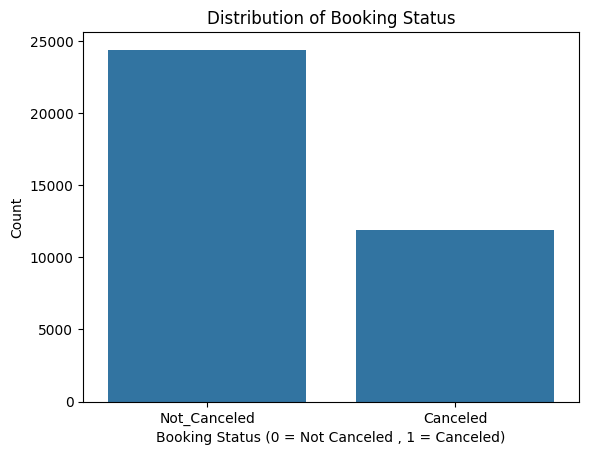

booking_status
Not_Canceled    67.236389
Canceled        32.763611
Name: proportion, dtype: float64


In [61]:
sns.countplot(x = df['booking_status'])
plt.title("Distribution of Booking Status")
plt.xlabel("Booking Status (0 = Not Canceled , 1 = Canceled)")
plt.ylabel("Count")
plt.show()

# Percentage of cancellations
cancellation_rate = df['booking_status'].value_counts(normalize=True) * 100
print(cancellation_rate)

## **2 . Lead Time  VS  Cancellations**

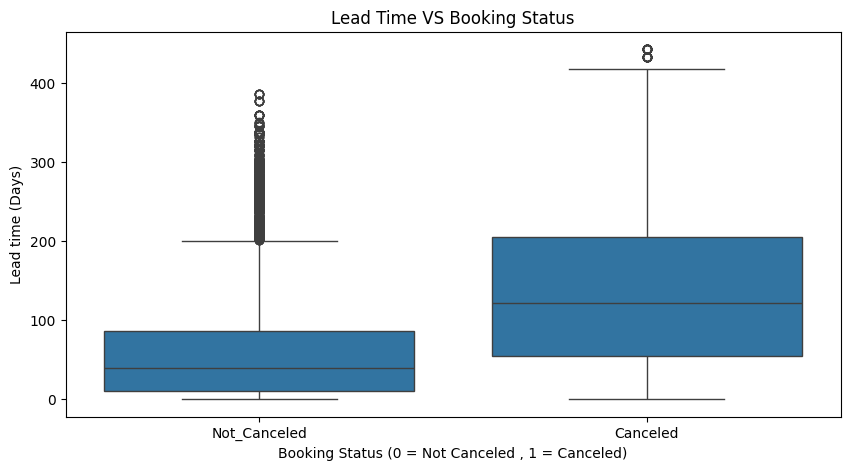

In [62]:
plt.figure(figsize = (10,5))
sns.boxplot(x = df['booking_status'], y = df['lead_time'])
plt.title('Lead Time VS Booking Status')
plt.xlabel('Booking Status (0 = Not Canceled , 1 = Canceled)')
plt.ylabel('Lead time (Days)')
plt.show()

## **3 . Guest Composition & Cancellations**

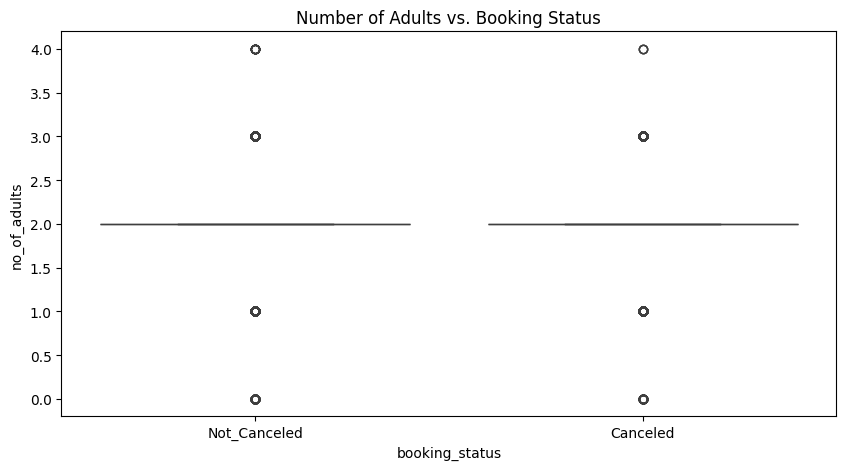

In [63]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['booking_status'], y=df['no_of_adults'])
plt.title("Number of Adults vs. Booking Status")
plt.show()

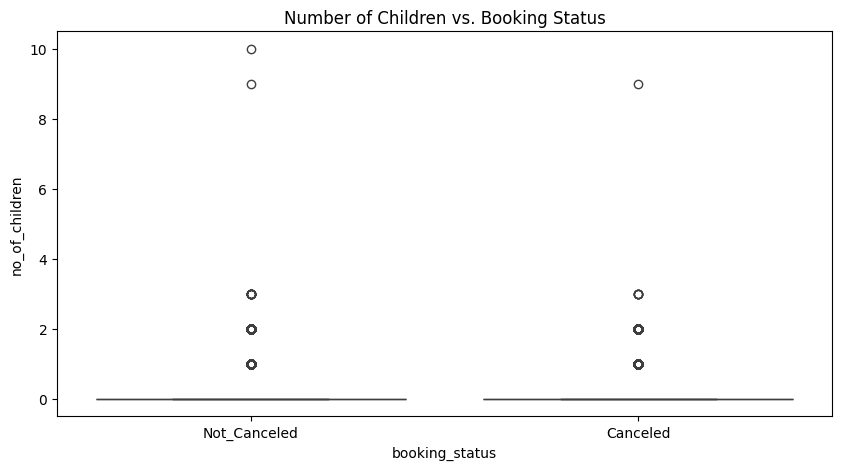

In [64]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['booking_status'], y=df['no_of_children'])
plt.title("Number of Children vs. Booking Status")
plt.show()

## **4 . Market Segment Influence**

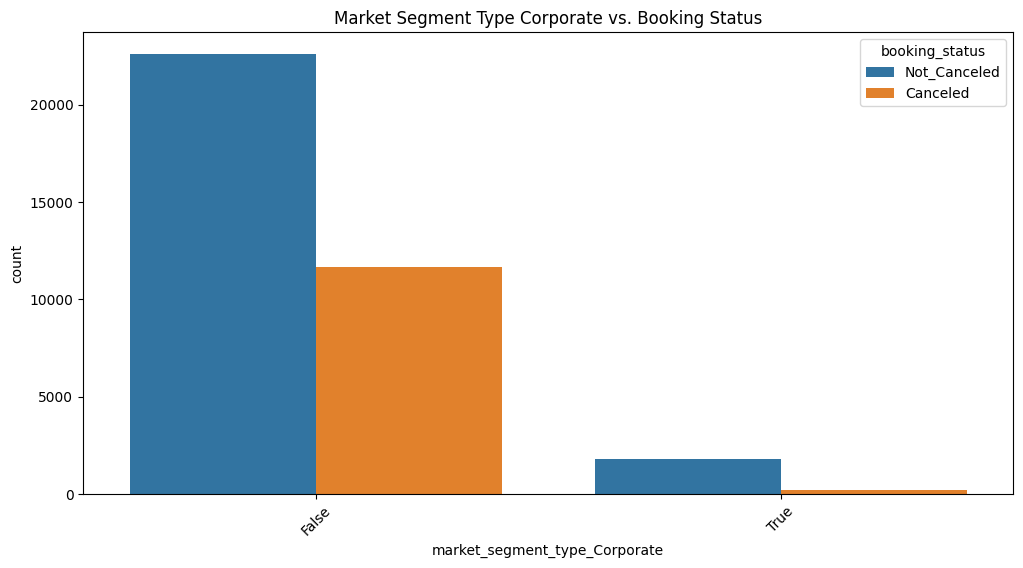

In [65]:
plt.figure(figsize=(12, 6))
sns.countplot(x = 'market_segment_type_Corporate', hue = 'booking_status', data=df)
plt.xticks(rotation=45)
plt.title("Market Segment Type Corporate vs. Booking Status")
plt.show()


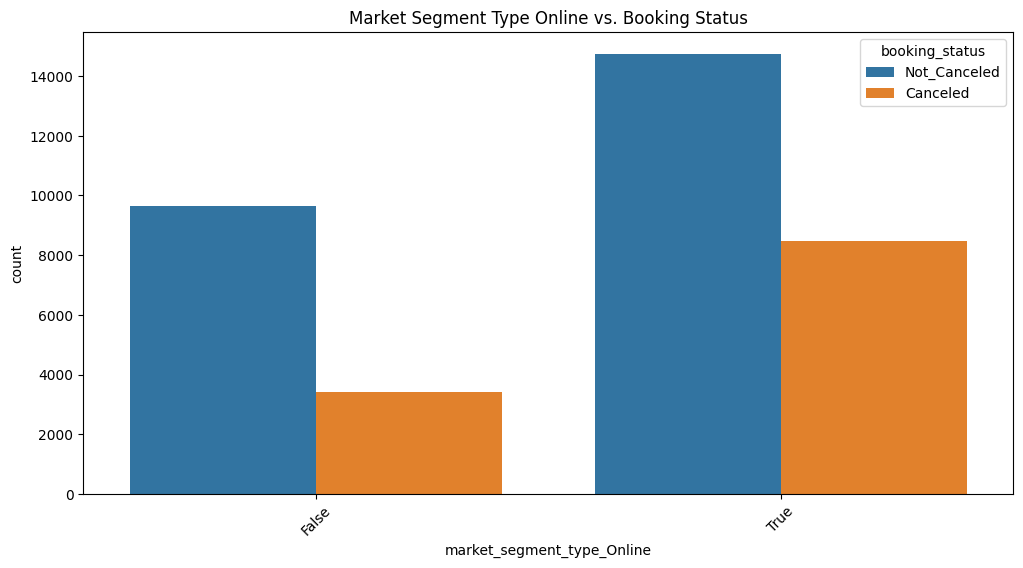

In [66]:
plt.figure(figsize=(12, 6))
sns.countplot(x='market_segment_type_Online', hue='booking_status', data=df)
plt.xticks(rotation=45)
plt.title("Market Segment Type Online vs. Booking Status")
plt.show()


## **5 . Booking Timing Impact**

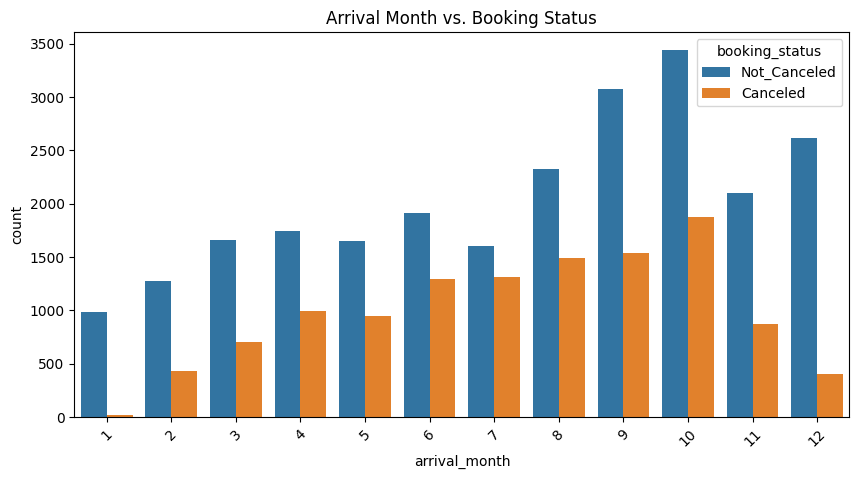

In [67]:
plt.figure(figsize=(10, 5))
sns.countplot(x='arrival_month', hue='booking_status', data=df)
plt.xticks(rotation=45)
plt.title("Arrival Month vs. Booking Status")
plt.show()


## **6 . Price & Cancellation Relationship**

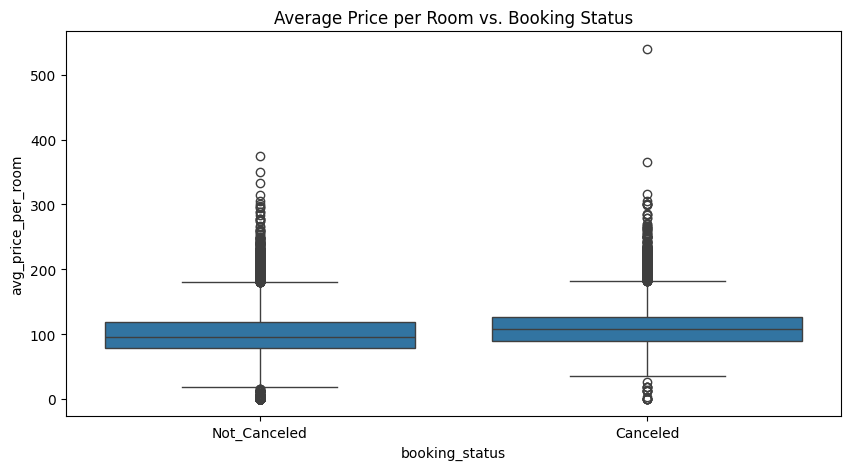

In [68]:
plt.figure(figsize=(10, 5))
sns.boxplot(x=df['booking_status'], y=df['avg_price_per_room'])
plt.title("Average Price per Room vs. Booking Status")
plt.show()


<div style="background-color:#e3f2fd; color:#1565c0; padding:12px; border-radius:8px; text-align:center;">
    <h1>📉 Outlier Detection</h1>
</div>


#**1️⃣ Boxplot for Outlier Detection**


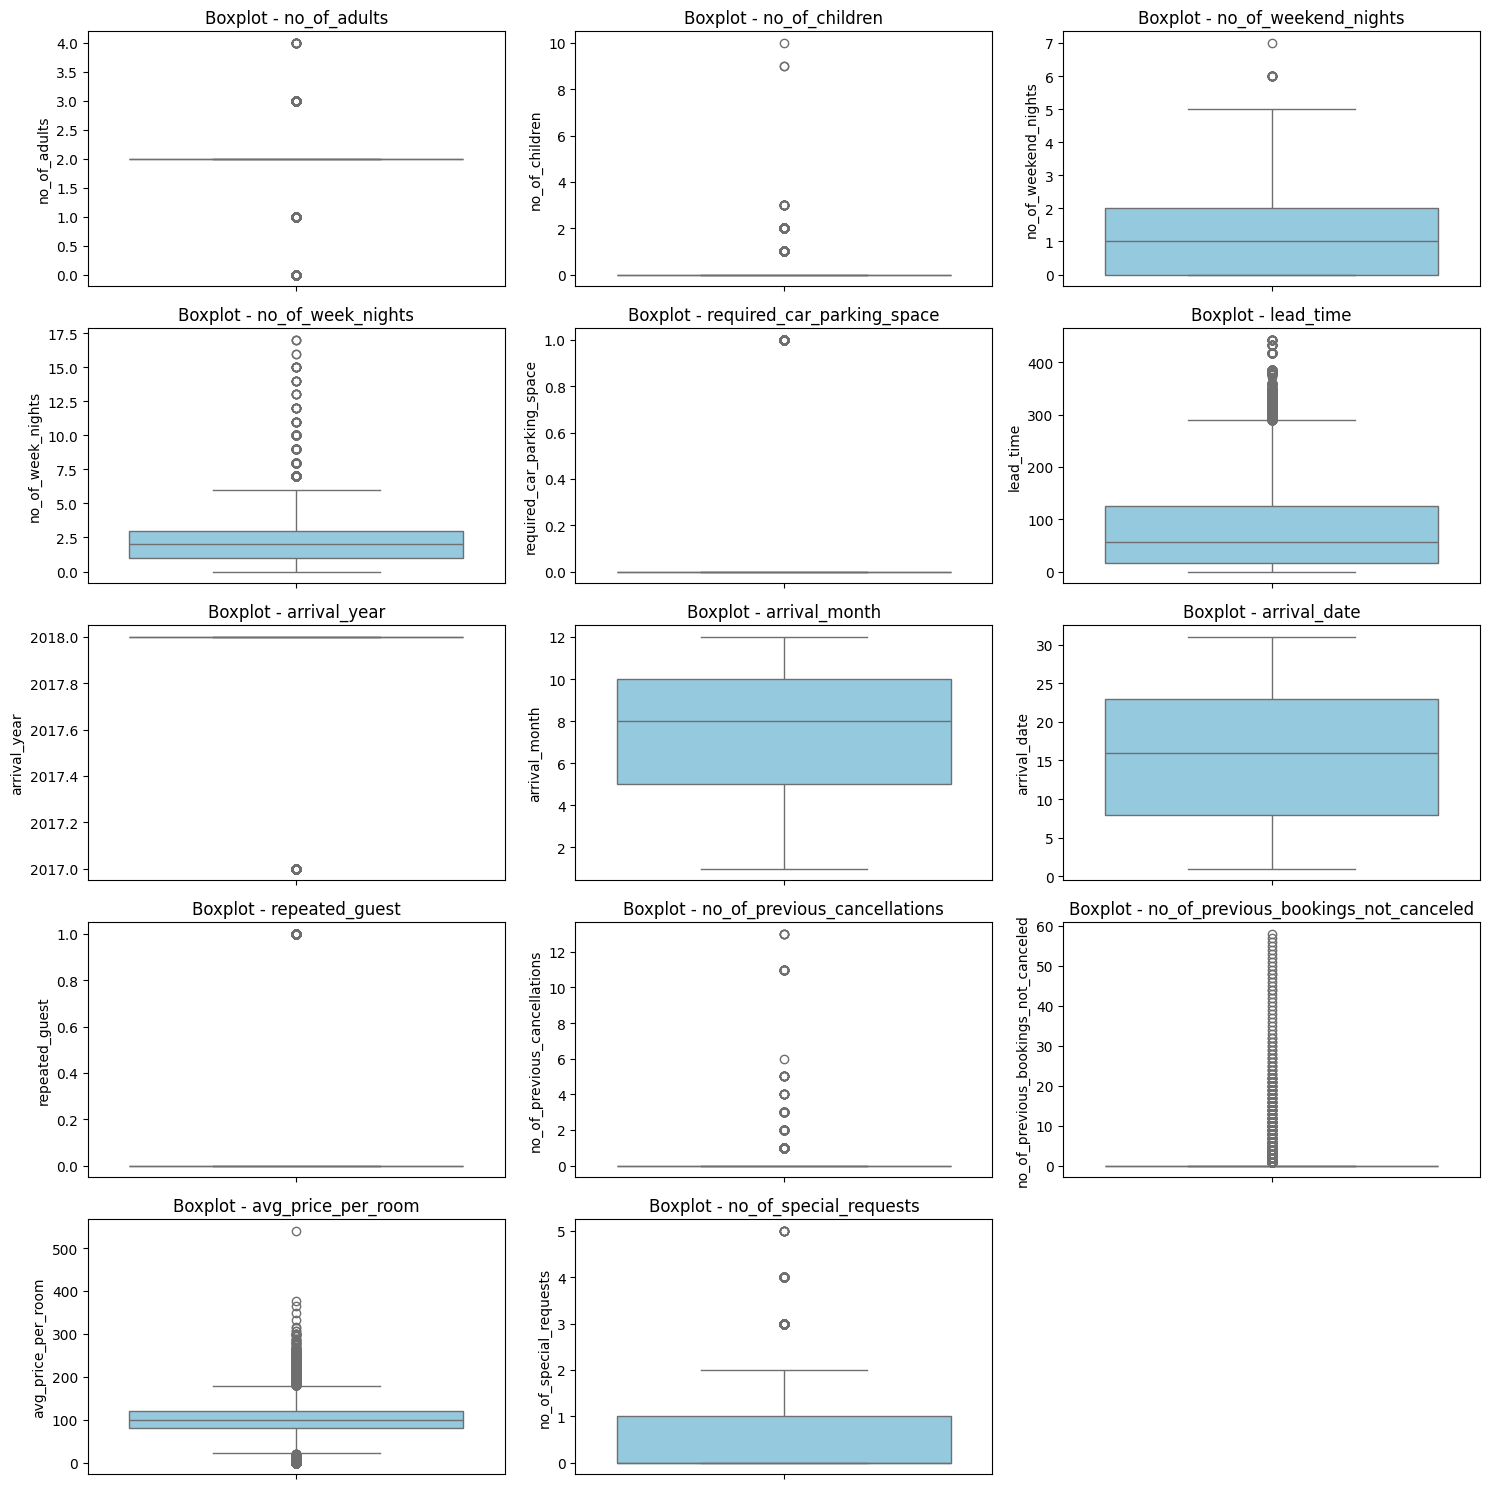

In [69]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the number of numerical features
num_numerical_features = len(df.select_dtypes(include='number').columns)

# Calculate the number of rows needed for subplots
num_rows = (num_numerical_features + 2) // 3  # Adjusted for 3 columns, +2 to round up

# Plotting boxplots for all numerical features
plt.figure(figsize=(15, 3 * num_rows))  # Adjust figure height based on rows
for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust grid size to accommodate all features
    sns.boxplot(data=df[column], color='skyblue')
    plt.title(f'Boxplot - {column}')
    plt.tight_layout()

plt.show()


#**2️⃣ Histogram for Distribution Analysis**


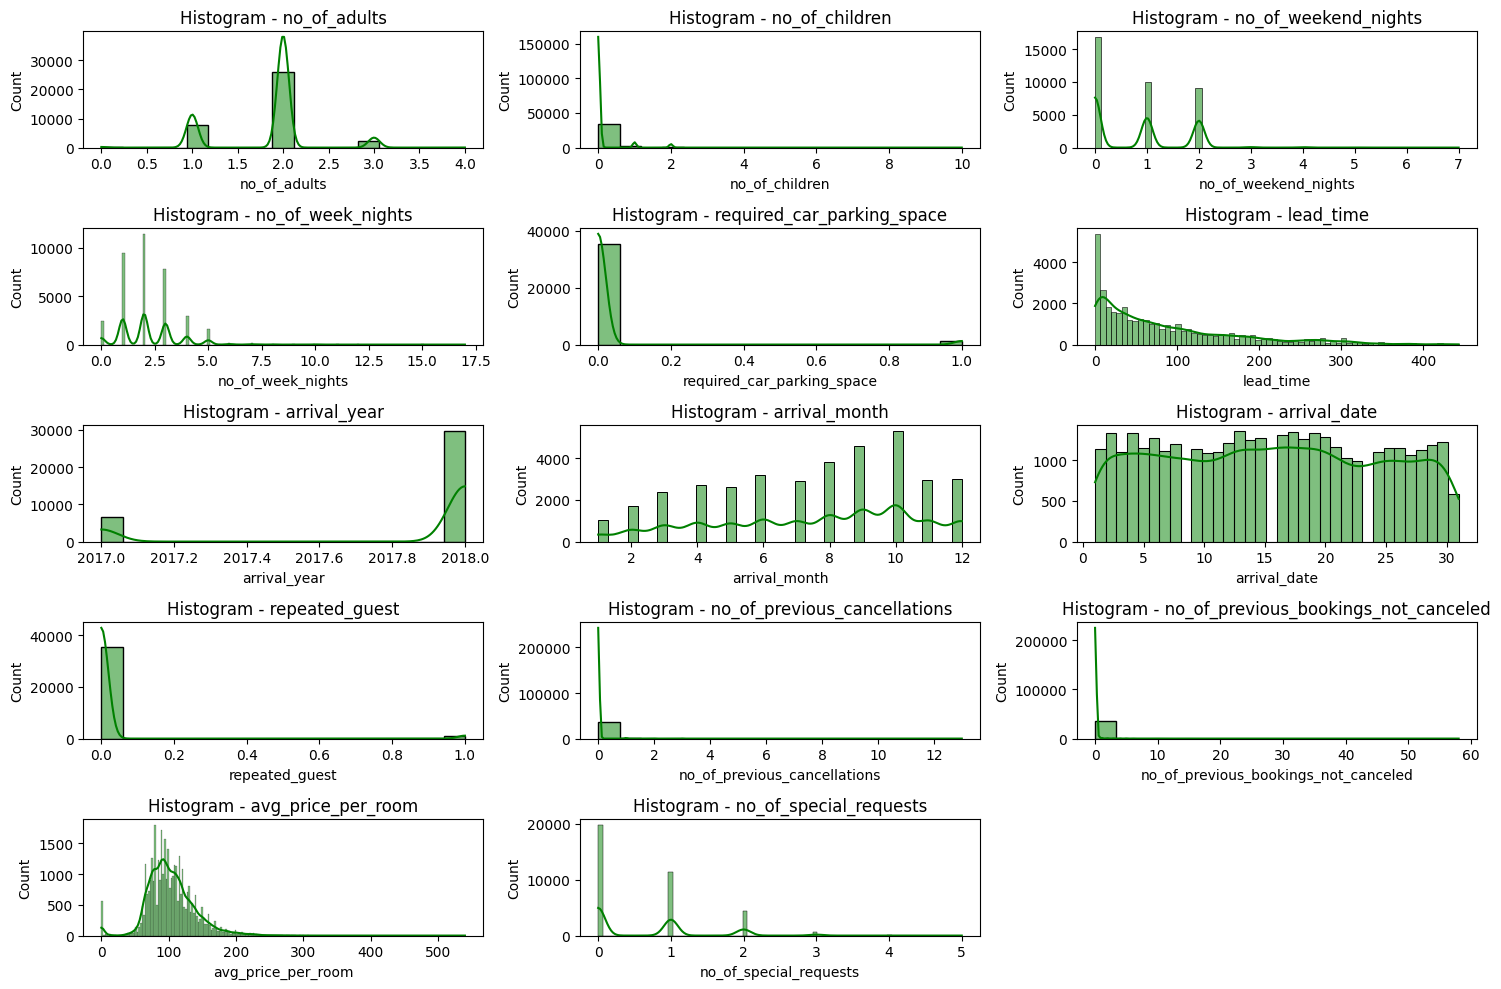

In [70]:
plt.figure(figsize=(15, 10))

# Calculate the number of numerical features
num_numerical_features = len(df.select_dtypes(include='number').columns)

# Calculate the number of rows needed for subplots
num_rows = (num_numerical_features + 2) // 3  # Adjusted for 3 columns, +2 to round up


# Plotting histograms for all numerical features
for i, column in enumerate(df.select_dtypes(include='number').columns, 1):
    plt.subplot(num_rows, 3, i)  # Adjust grid size to accommodate all features
    sns.histplot(df[column], kde=True, color='green')
    plt.title(f'Histogram - {column}')
    plt.tight_layout()

plt.show()


#**3️⃣ Outlier Detection Using IQR (Interquartile Range)**


In [71]:
# Removing Outliers Using IQR
def remove_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1

    # Define Outlier Boundaries
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Remove Outliers
    cleaned_data = data[(data[column] >= lower_bound) & (data[column] <= upper_bound)]
    return cleaned_data

# Example Usage
X_cleaned = df.copy()
for col in df.select_dtypes(include='number').columns:
    X_cleaned = remove_outliers_iqr(X_cleaned, col)

print("✅ Outlier removal complete. New dataset shape:", X_cleaned.shape)



✅ Outlier removal complete. New dataset shape: (17158, 28)


In [72]:
X_cleaned

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,required_car_parking_space,lead_time,arrival_year,arrival_month,arrival_date,repeated_guest,...,room_type_reserved_Room_Type 2,room_type_reserved_Room_Type 3,room_type_reserved_Room_Type 4,room_type_reserved_Room_Type 5,room_type_reserved_Room_Type 6,room_type_reserved_Room_Type 7,market_segment_type_Complementary,market_segment_type_Corporate,market_segment_type_Offline,market_segment_type_Online
1,2,0,2,3,0,5,2018,11,6,0,...,False,False,False,False,False,False,False,False,False,True
3,2,0,0,2,0,211,2018,5,20,0,...,False,False,False,False,False,False,False,False,False,True
4,2,0,1,1,0,48,2018,4,11,0,...,False,False,False,False,False,False,False,False,False,True
7,2,0,1,3,0,83,2018,12,26,0,...,False,False,True,False,False,False,False,False,False,True
12,2,0,2,1,0,30,2018,11,26,0,...,False,False,False,False,False,False,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36267,2,0,1,0,0,49,2018,7,11,0,...,False,False,False,False,False,False,False,False,False,True
36271,2,0,1,3,0,228,2018,10,17,0,...,False,False,False,False,False,False,False,False,False,True
36272,2,0,2,6,0,148,2018,7,1,0,...,False,False,False,False,False,False,False,False,False,True
36273,2,0,0,3,0,63,2018,4,21,0,...,False,False,False,False,False,False,False,False,False,True


In [73]:
df.shape

(36275, 28)

<div style="background-color:#333333; color:#ffffff; padding:10px; border-radius:8px;">
    <h1>🔧 Feature Scaling</h1>
</div>


In [74]:
scaler = StandardScaler()
num_cols = ['lead_time', 'avg_price_per_room', 'no_of_special_requests']

df[num_cols] = scaler.fit_transform(df[num_cols])

<div style="background-color:#fff4e5; color:#e67e22; padding:12px; border-radius:8px;">
    <h1>🧪 Data Splitting</h1>
</div>


In [75]:
X = df.drop(columns=['booking_status'])
y = df['booking_status']

# Split data into training & testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


<div style="background-color:#f3e5f5; color:#6a1b9a; padding:12px; border-radius:8px; text-align:center;">
    <h1>📈 Model Selection</h1>
</div>


## **1️⃣Decision Tree Classifier**



Decision Tree Accuracy: 0.8702963473466575
              precision    recall  f1-score   support

    Canceled       0.80      0.82      0.81      2416
Not_Canceled       0.91      0.90      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.85      0.86      0.85      7255
weighted avg       0.87      0.87      0.87      7255



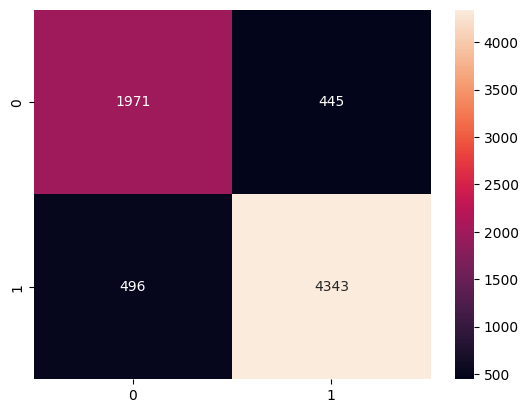

In [76]:
dt_model = DecisionTreeClassifier(random_state=42)
dt_model.fit(X_train, y_train)
y_pred_dt = dt_model.predict(X_test)

print("Decision Tree Accuracy:", accuracy_score(y_test, y_pred_dt))
print(classification_report(y_test, y_pred_dt))
sns.heatmap(confusion_matrix(y_test, y_pred_dt), annot=True, fmt="d")
plt.show()


## **Hperparameter Tunning of Decision Tree**

Best Parameters for Decision Tree: {'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy (Tuned): 0.8693314955203308
              precision    recall  f1-score   support

    Canceled       0.82      0.77      0.80      2416
Not_Canceled       0.89      0.92      0.90      4839

    accuracy                           0.87      7255
   macro avg       0.86      0.85      0.85      7255
weighted avg       0.87      0.87      0.87      7255



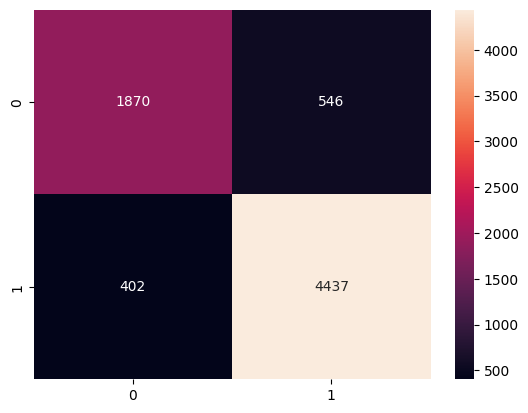

In [77]:
# Define hyperparameter grid
param_grid_dt = {
    'max_depth': [5, 10, 20, 30, None],  # Limits tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Initialize GridSearchCV
grid_search_dt = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid_dt, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search_dt.fit(X_train, y_train)

# Get best hyperparameters
print("Best Parameters for Decision Tree:", grid_search_dt.best_params_)

# Evaluate best model
best_dt_model = grid_search_dt.best_estimator_
y_pred_dt_best = best_dt_model.predict(X_test)

print("Decision Tree Accuracy (Tuned):", accuracy_score(y_test, y_pred_dt_best))
print(classification_report(y_test, y_pred_dt_best))
sns.heatmap(confusion_matrix(y_test, y_pred_dt_best), annot=True, fmt="d")
plt.show()


#**2️⃣Random Forest Classifier**

Random Forest Accuracy: 0.9058580289455548
              precision    recall  f1-score   support

    Canceled       0.88      0.83      0.85      2416
Not_Canceled       0.92      0.95      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.89      0.89      7255
weighted avg       0.91      0.91      0.91      7255



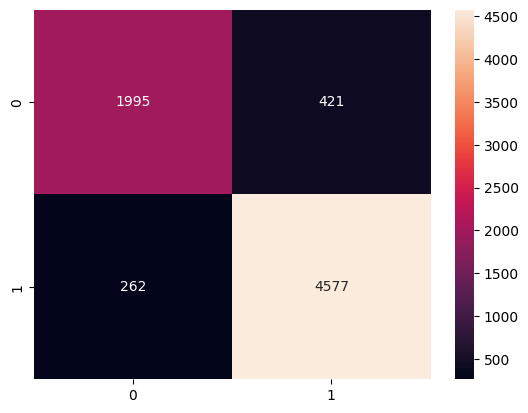

In [78]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("Random Forest Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt="d")
plt.show()


## **Hperparameter Tunning of Random Forest**

Best Parameters for Random Forest: {'criterion': 'entropy', 'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Decision Tree Accuracy (Tuned): 0.9050310130944177
              precision    recall  f1-score   support

    Canceled       0.88      0.83      0.85      2416
Not_Canceled       0.92      0.94      0.93      4839

    accuracy                           0.91      7255
   macro avg       0.90      0.89      0.89      7255
weighted avg       0.90      0.91      0.90      7255



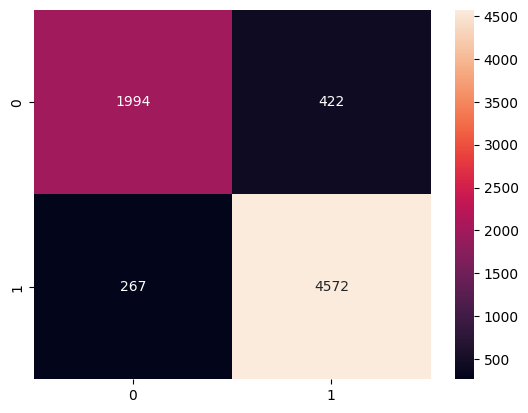

In [79]:
# Define hyperparameter grid
param_grid_rf = {
    'max_depth': [5, 10, 20, 30, None],  # Limits tree depth
    'min_samples_split': [2, 5, 10],  # Minimum samples to split a node
    'min_samples_leaf': [1, 2, 4],  # Minimum samples at a leaf
    'criterion': ['gini', 'entropy']  # Split criterion
}

# Initialize GridSearchCV
grid_search_rf = GridSearchCV(RandomForestClassifier(random_state=42), param_grid_rf, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search_rf.fit(X_train, y_train)

# Get best hyperparameters
print("Best Parameters for Random Forest:", grid_search_rf.best_params_)

# Evaluate best model
best_rf_model = grid_search_rf.best_estimator_
y_pred_rf_best = best_rf_model.predict(X_test)

print("Decision Tree Accuracy (Tuned):", accuracy_score(y_test, y_pred_rf_best))
print(classification_report(y_test, y_pred_rf_best))
sns.heatmap(confusion_matrix(y_test, y_pred_rf_best), annot=True, fmt="d")
plt.show()


# **3️⃣Logistic Regression**

Logistic Regression Accuracy: 0.7972432804962095
              precision    recall  f1-score   support

    Canceled       0.73      0.61      0.67      2416
Not_Canceled       0.82      0.89      0.85      4839

    accuracy                           0.80      7255
   macro avg       0.78      0.75      0.76      7255
weighted avg       0.79      0.80      0.79      7255



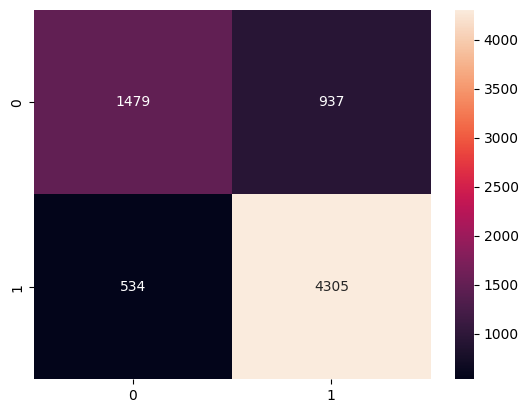

In [80]:
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)
y_pred_lr = lr_model.predict(X_test)

print("Logistic Regression Accuracy:", accuracy_score(y_test, y_pred_lr))
print(classification_report(y_test, y_pred_lr))
sns.heatmap(confusion_matrix(y_test, y_pred_lr), annot=True, fmt="d")
plt.show()


## **Hyperparameter Tunning of Logistic Regression**

Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Logistic Regression Accuracy (Tuned): 0.8041350792556857
              precision    recall  f1-score   support

    Canceled       0.75      0.62      0.68      2416
Not_Canceled       0.83      0.89      0.86      4839

    accuracy                           0.80      7255
   macro avg       0.79      0.76      0.77      7255
weighted avg       0.80      0.80      0.80      7255



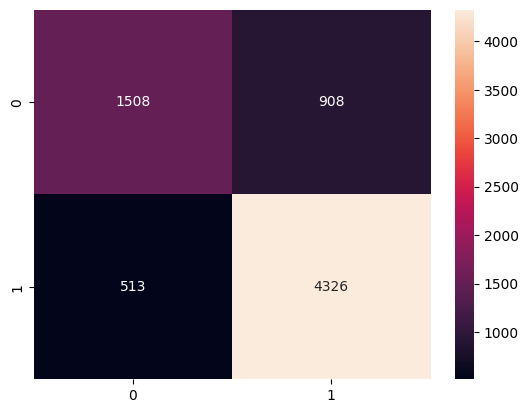

In [81]:
# Define hyperparameter grid
param_grid_lr = {
    'C': [0.01, 0.1, 1, 10, 100],  # Regularization strength
    'solver': ['liblinear', 'lbfgs', 'saga'],  # Optimization algorithms
    'penalty': ['l1', 'l2']  # Regularization types
}

# Initialize GridSearchCV
grid_search_lr = GridSearchCV(LogisticRegression(max_iter=500), param_grid_lr, cv=5, scoring='accuracy', n_jobs=-1)

# Fit on training data
grid_search_lr.fit(X_train, y_train)

# Get best hyperparameters
print("Best Parameters for Logistic Regression:", grid_search_lr.best_params_)

# Evaluate best model
best_lr_model = grid_search_lr.best_estimator_
y_pred_lr_best = best_lr_model.predict(X_test)

print("Logistic Regression Accuracy (Tuned):", accuracy_score(y_test, y_pred_lr_best))
print(classification_report(y_test, y_pred_lr_best))
sns.heatmap(confusion_matrix(y_test, y_pred_lr_best), annot=True, fmt="d")
plt.show()


#**📌Performance Metrics for Each Model**

In [82]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
# Define Models
models = {
    "Logistic Regression": best_lr_model,  # Tuned Logistic Regression
    "Decision Tree": best_dt_model,  # Tuned Decision Tree
    "Random Forest": rf_model  # Tuned Random Forest (Assuming it was trained)
}

# Initialize results dictionary
model_results = {}

# Evaluate Each Model
for name, model in models.items():
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    model_results[name] = accuracy

    print(f" Model: {name}")
    print("Accuracy:", accuracy)
    #print(classification_report(y_test, y_pred))
    print("  ")


 Model: Logistic Regression
Accuracy: 0.8041350792556857
  
 Model: Decision Tree
Accuracy: 0.8693314955203308
  
 Model: Random Forest
Accuracy: 0.9058580289455548
  




#<h1 style="color:#4CAF50; font-size:28px;">🚀 **Key Areas Too Analyze**</h1>


#**1️⃣ Lead Time Analysis – Impact on Cancellations**




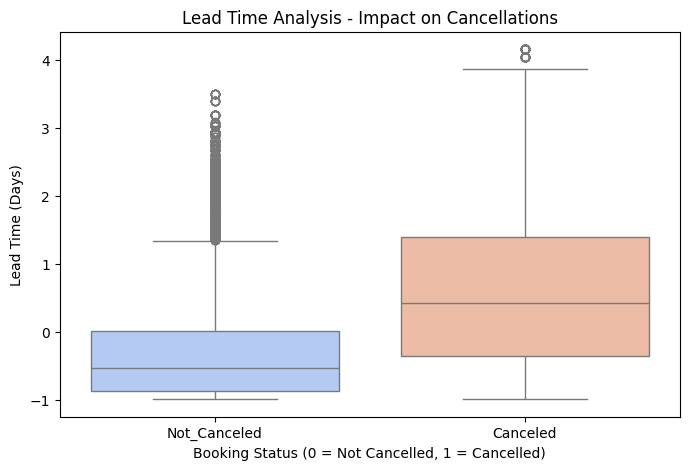

                  count      mean       std       min       25%       50%  \
booking_status                                                              
Canceled        11885.0  0.628222  1.151497 -0.991888 -0.351829  0.427879   
Not_Canceled    24390.0 -0.306126  0.745130 -0.991888 -0.875514 -0.538028   

                     75%       max  
booking_status                      
Canceled        1.393785  4.163493  
Not_Canceled    0.008931  3.500160  


In [83]:
# Lead Time Analysis
plt.figure(figsize=(8, 5))
sns.boxplot(x='booking_status', y='lead_time', data=df, palette='coolwarm')
plt.title("Lead Time Analysis - Impact on Cancellations")
plt.xlabel("Booking Status (0 = Not Cancelled, 1 = Cancelled)")
plt.ylabel("Lead Time (Days)")
plt.show()

# Statistical Insight
print(df.groupby('booking_status')['lead_time'].describe())



#**2️⃣ Guest Composition Analysis – Impact on Cancellations**


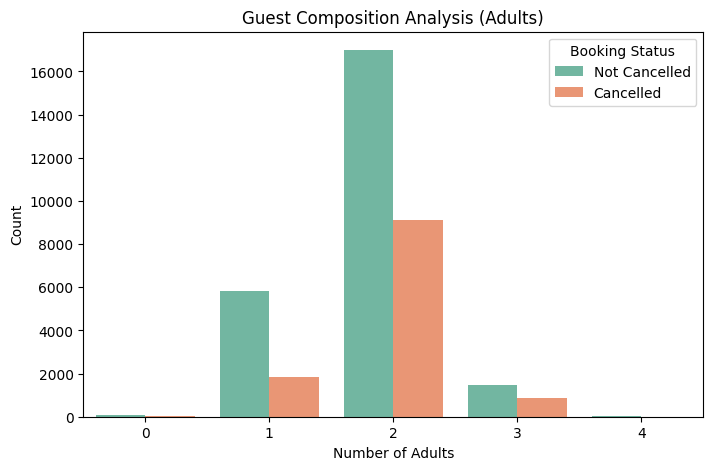

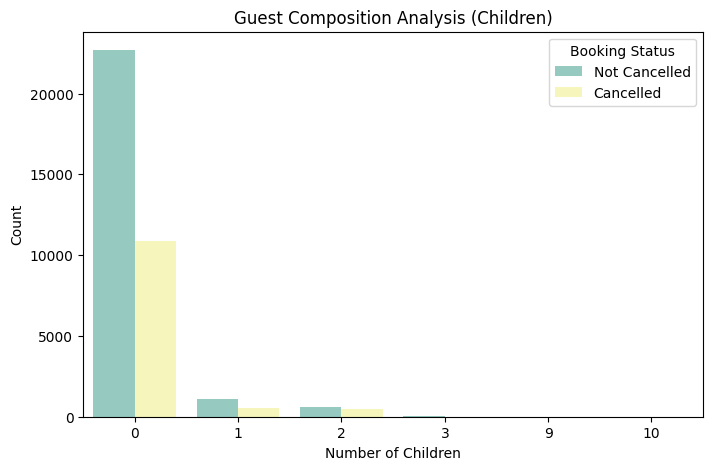

booking_status  Canceled  Not_Canceled
no_of_adults                          
0                     44            95
1                   1856          5839
2                   9119         16989
3                    863          1454
4                      3            13
booking_status  Canceled  Not_Canceled
no_of_children                        
0                10882.0       22695.0
1                  540.0        1078.0
2                  457.0         601.0
3                    5.0          14.0
9                    1.0           1.0
10                   NaN           1.0


In [84]:
# Guest Composition Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='no_of_adults', hue='booking_status', data=df, palette='Set2')
plt.title("Guest Composition Analysis (Adults)")
plt.xlabel("Number of Adults")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(x='no_of_children', hue='booking_status', data=df, palette='Set3')
plt.title("Guest Composition Analysis (Children)")
plt.xlabel("Number of Children")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.show()

# Statistical Insight
print(df.groupby(['no_of_adults', 'booking_status']).size().unstack())
print(df.groupby(['no_of_children', 'booking_status']).size().unstack())


#**3️⃣ Booking Timing Analysis – Weekdays vs. Weekends**



In [88]:
# Booking Timing Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='arrival_date_weekday', hue='booking_status', data=df, palette='Paired')
plt.title("Impact of Weekdays vs. Weekends on Cancellations")
plt.xlabel("Day of Arrival")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.xticks(rotation=45)
plt.show()

# Statistical Insight
weekday_stats = df.groupby(['arrival_date_weekday', 'booking_status']).size().unstack()
print("Booking Timing Analysis:\n", weekday_stats)


ValueError: Could not interpret value `arrival_date_weekday` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>

#**4️⃣ Market Segment & Repeated Guest Analysis**


In [89]:
# Market Segment Analysis
plt.figure(figsize=(8, 5))
sns.countplot(x='market_segment_type', hue='booking_status', data=df, palette='Accent')
plt.title("Impact of Market Segment on Cancellations")
plt.xlabel("Market Segment")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.show()

# Repeated Guest Analysis
plt.figure(figsize=(6, 4))
sns.countplot(x='repeated_guest', hue='booking_status', data=df, palette='viridis')
plt.title("Impact of Repeated Guest Status on Cancellations")
plt.xlabel("Repeated Guest (0 = No, 1 = Yes)")
plt.ylabel("Count")
plt.legend(title="Booking Status", labels=["Not Cancelled", "Cancelled"])
plt.show()

# Statistical Insight
market_segment_stats = df.groupby(['market_segment_type', 'booking_status']).size().unstack()
repeated_guest_stats = df.groupby(['repeated_guest', 'booking_status']).size().unstack()
print("Market Segment Analysis:\n", market_segment_stats)
print("\nRepeated Guest Analysis:\n", repeated_guest_stats)


ValueError: Could not interpret value `market_segment_type` for `x`. An entry with this name does not appear in `data`.

<Figure size 800x500 with 0 Axes>